In [1]:
import tensorflow as tf
from utils import setting
import tensorflow.keras as ks
from tensorflow.keras import layers
from model import Loss

In [4]:
train_tfrecord,val_tfrecord  ="data/tfrecord/train.tfrecords", "data/tfrecord/val.tfrecords"

In [7]:
dataset = tf.data.TFRecordDataset(train_tfrecord)
val_dataset = tf.data.TFRecordDataset(val_tfrecord)

feature_description = {
'label': tf.io.FixedLenFeature([], tf.string),
'image_raw': tf.io.FixedLenFeature([], tf.string)
}
def read_and_decode(example_string):
	feature_dict = tf.io.parse_single_example(example_string, feature_description)
	image = tf.io.decode_raw(feature_dict['image_raw'], tf.uint8)
	image = tf.reshape(image, [448, 448, 3])
	image = (tf.cast(image, tf.float32) / 255.0 - 0.5) * 2
	label = tf.io.decode_raw(feature_dict['label'], tf.float64)
	label = tf.reshape(label, [7, 7, 25])
	return image, label
		
dataset = dataset.repeat()
dataset = dataset.map(read_and_decode)

In [9]:
dataset.take(5)

<TakeDataset shapes: ((448, 448, 3), (7, 7, 25)), types: (tf.float32, tf.float64)>

In [38]:
import numpy as np

In [42]:
!pip install matplotlib

Looking in indexes: https://mirrors.aliyun.com/pypi/simple/


In [46]:
import matplotlib.pyplot as plt

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


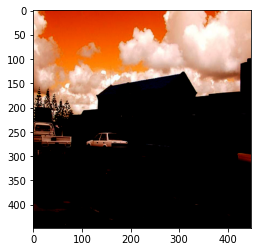

0 ================ [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]]
1 ================ [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]
 

In [50]:
for i in dataset.take(1):
    print("==============================================================================")
    plt.imshow(i[0].numpy())
    plt.show()
    x = i[1].numpy()
    for j in range(len(x)):
        print(j,"================", x[j])
    